### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Datasets Information:`

*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating

*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)


*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use

**`Please provide your insights wherever necessary.`**

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### 1. Import the necessary packages

In [39]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### 2. Read the 3 datasets into dataframes

In [17]:
data = pd.read_csv('Data.csv')
item = pd.read_csv('item.csv')
user = pd.read_csv('user.csv')

### 3. Apply info, shape, describe, and find the number of missing values in the data. Present at least 3 observations from these operations 
 - Note that you will need to do it for all the three datasets seperately

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [15]:
#Run shape function on all three dataframes
data.shape

(100000, 4)

In [8]:
data.describe(include='all')

,user id,movie id,rating,timestamp
count,100000.00,100000.00,100000.00,100000.00
mean,462.48,425.53,3.53,883528851.49
std,266.61,330.80,1.13,5343856.19
min,1.00,1.00,1.00,874724710.00
25%,254.00,175.00,3.00,879448709.50
50%,447.00,322.00,4.00,882826944.00
75%,682.00,631.00,4.00,888259984.00
max,943.00,1682.00,5.00,893286638.00


In [18]:
print(data.isnull().sum())

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64


In [13]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [16]:
item.shape

(1681, 22)

In [9]:
item.describe(include='all')

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.00,1681,1681,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00
unique,nan,1658,240,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,nan,That Darn Cat!,01-Jan-1995,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,nan,3,215,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,841.84,NaN,NaN,0.00,0.15,0.08,0.02,0.07,0.30,0.06,0.03,0.43,0.01,0.01,0.05,0.03,0.04,0.15,0.06,0.15,0.04,0.02
std,485.64,NaN,NaN,0.02,0.36,0.27,0.16,0.26,0.46,0.25,0.17,0.50,0.11,0.12,0.23,0.18,0.19,0.35,0.24,0.36,0.20,0.13
min,1.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,422.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,842.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1262.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [19]:
print(item.isnull().sum())

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64


In [14]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [17]:
user.shape

(943, 5)

In [10]:
user.describe(include='all')

,user id,age,gender,occupation,zip code
count,943.00,943.00,943,943,943
unique,nan,nan,2,21,795
top,nan,nan,M,student,55414
freq,nan,nan,670,196,9
mean,472.00,34.05,NaN,NaN,NaN
std,272.36,12.19,NaN,NaN,NaN
min,1.00,7.00,NaN,NaN,NaN
25%,236.50,25.00,NaN,NaN,NaN
50%,472.00,31.00,NaN,NaN,NaN
75%,707.50,43.00,NaN,NaN,NaN


In [20]:
print(user.isnull().sum())

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64


**Observations:**
1. None of the datasets has null values. 
2. 1681 movies released during the analysed time period. 
3. In total, 943 people rated these movies.
4. Movies rated at the scale of 1 to 5 - (5 scale rating)

### 4. Find the number of movies per genre using the item data 

In [11]:
genre = item[item == 1].sum(axis=0)
genre.sort_values(ascending=False)

Drama          725.00
Comedy         505.00
Thriller       251.00
Action         251.00
Romance        247.00
Adventure      135.00
Childrens      122.00
Crime          109.00
Sci-Fi         101.00
Horror          92.00
War             71.00
Mystery         61.00
Musical         56.00
Documentary     50.00
Animation       42.00
Western         27.00
Film-Noir       24.00
Fantasy         22.00
unknown          1.00
movie id         1.00
release date     0.00
movie title      0.00
dtype: float64

**Insights:**

1. More Drama-Genre movies were released - 725
2. Drama, Comedy, thriller ranks the top3 genre released
3. Less Fantasy movies released during this time period
4. Fantasy, Film-Noir, Western  were the least released genres





### 5. Drop the movie where the genre is unknown 

In [18]:
item.shape #Before droping the movie where the genre is unknown

(1681, 22)

In [19]:
item.drop(item.loc[item['unknown']==1].index, inplace=True) # Droping the movie where the genre is unknown

In [20]:
item.shape #After droping the movie where the genre is unknown

(1680, 22)

**Insights:**
1. Genre of movie tilted "Good Morning" released in 1971 is not known.  
2. Unknown genre was marked by a column named unknown
3. Among 1681 movies, only one dont have Genre label

### 6. Find the movies that have more than one genre 



Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [31]:
item = pd.read_csv('item.csv')
item['genre_count'] = item.drop('movie id', axis=1).sum(axis=1)

In [27]:
item[['movie title','genre_count']] #Display movie name, number of genres for the movie in dataframe

,movie title,genre_count
0,Toy Story,3
1,GoldenEye,3
2,Four Rooms,1
3,Get Shorty,3
4,Copycat,3
5,Shanghai Triad (Yao a yao yao dao waipo qiao),1
6,Twelve Monkeys,2
7,Babe,3
8,Dead Man Walking,1
9,Richard III,2


In [35]:
item[['movie title','genre_count']].sort_values(by=['genre_count'],ascending=False) #Display movie name, number of genres for the movie in dataframe

,movie title,genre_count
424,"Transformers: The Movie, The",6
558,"Kid in King Arthur's Court, A",6
171,"Empire Strikes Back, The",6
818,Space Jam,5
16,From Dusk Till Dawn,5
49,Star Wars,5
1074,"Pagemaster, The",5
100,Heavy Metal,5
991,Hercules,5
183,Army of Darkness,5


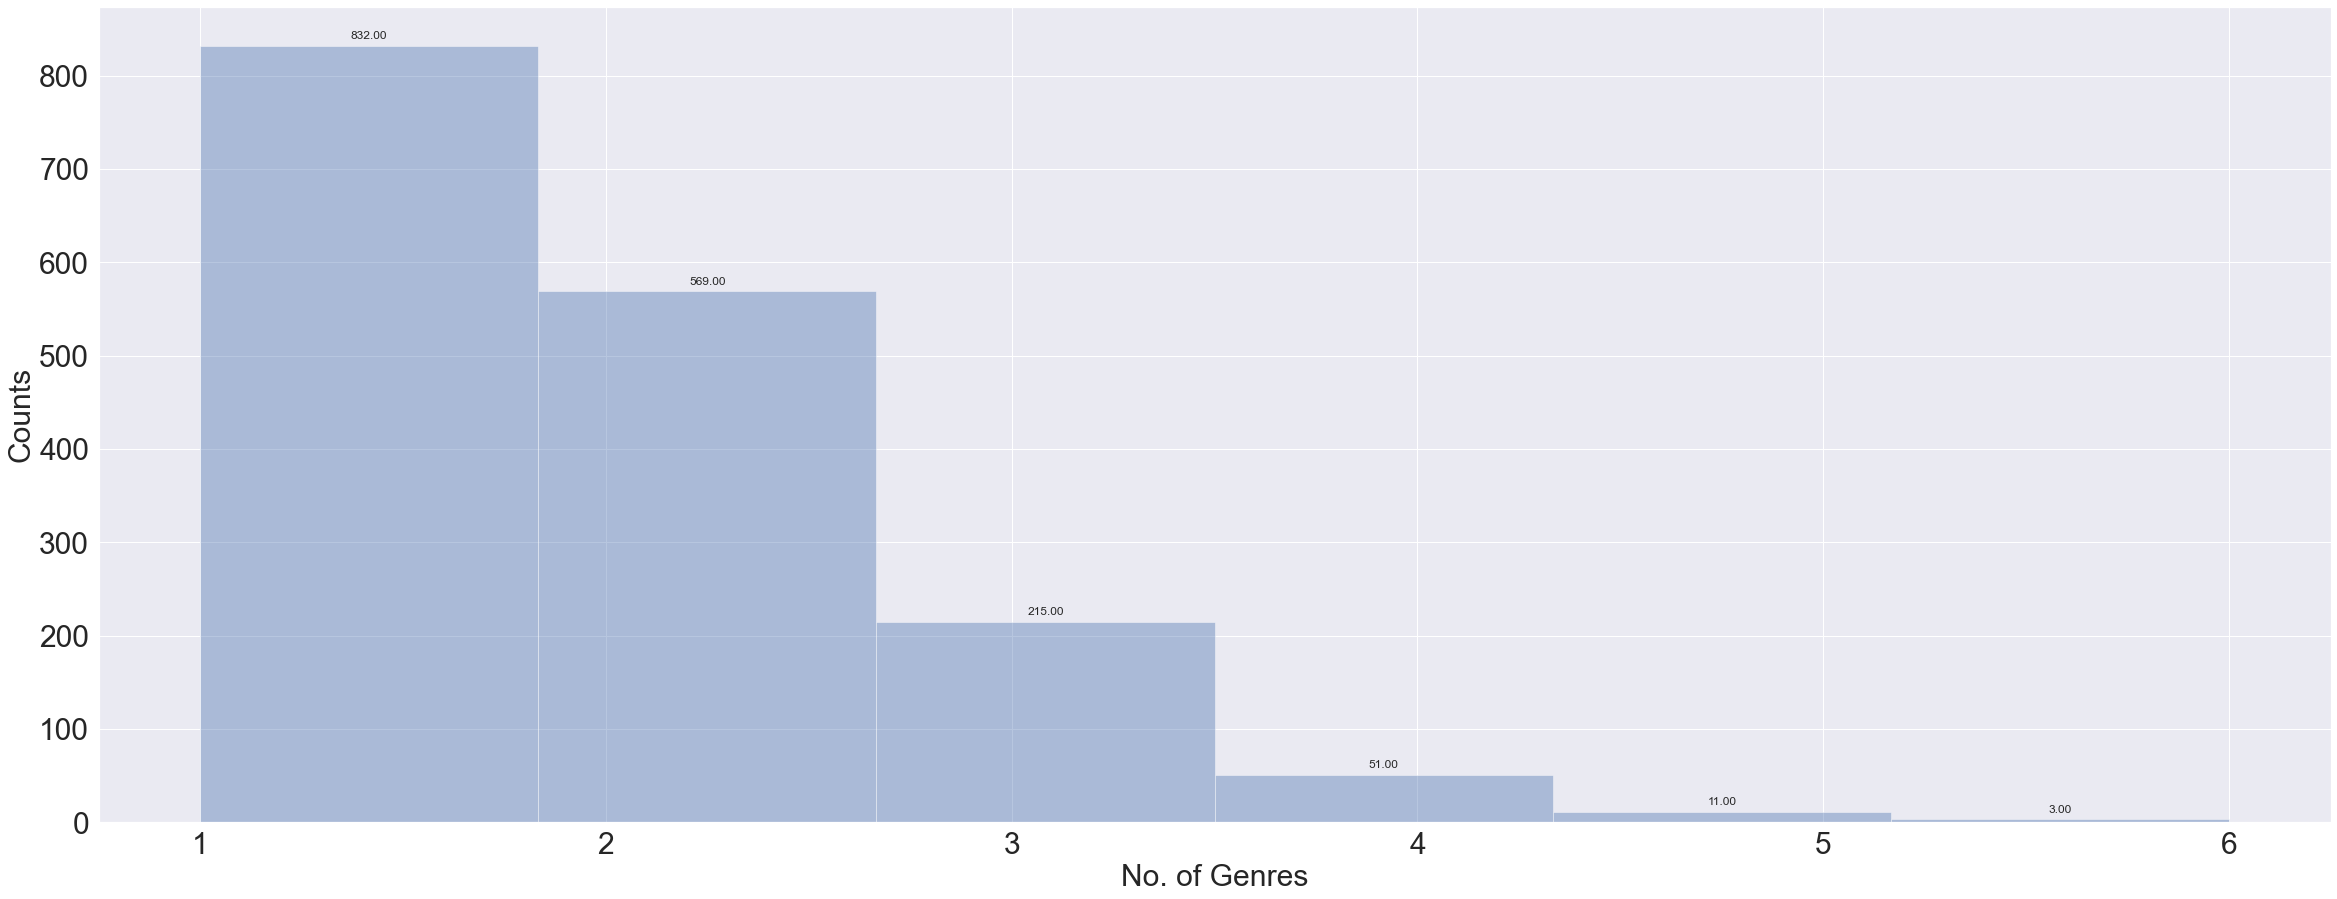

In [62]:
g= sns.distplot(item['genre_count'], kde=False, bins=6)
#g.set(yscale="log")
g.set_xlabel("No. of Genres",fontsize=30)
g.set_ylabel("Counts",fontsize=30)
g.tick_params(labelsize=30)

for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
   
plt.show()

In [30]:
print('Total movies with more than 1 gennre', item[item.genre_count > 1][['movie title']].count()) #print(total number of movies which have more than one genres)

Total movies with more than 1 gennre movie title    849
dtype: int64


**Insights:**
1. In total 849 movies (~50%) have more than one genre.
2. One in two movies have more than one genre
3. At the max, a single movie marked towards 6 genres
4. There are three movies marked for 6 genres  


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation'

*HINT: Use distplot for age and countplot for release year, ratings, *

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

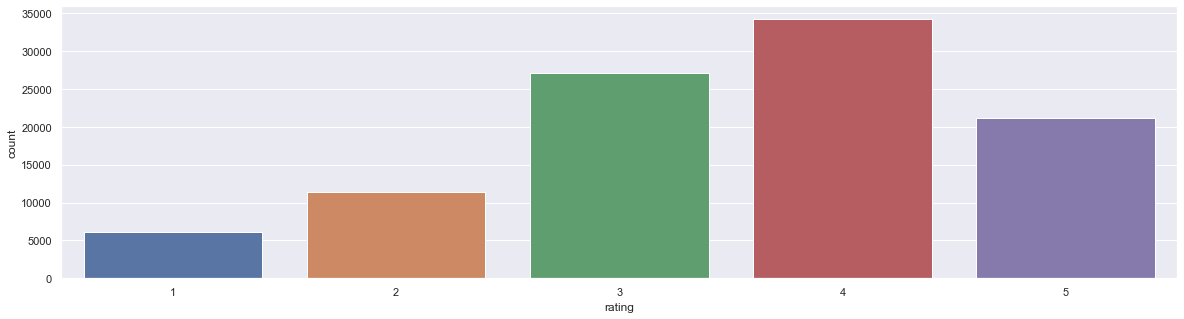

In [33]:
# Rating 
sns.countplot(data['rating'])

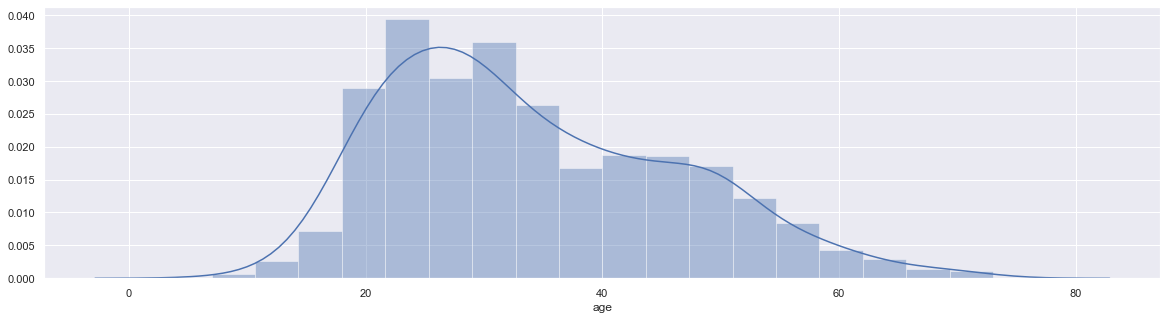

In [34]:
# Age
sns.distplot(user['age'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70]),
 <a list of 71 Text major ticklabel objects>)

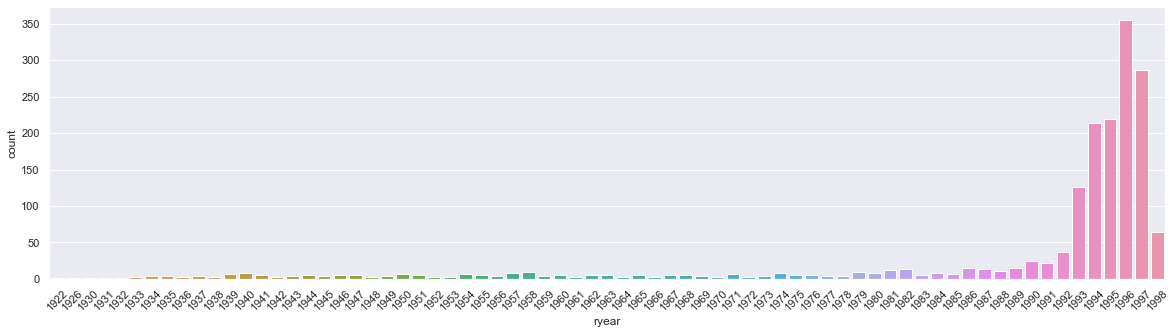

In [32]:
# Release Year
item['rdate'] = pd.to_datetime(item['release date'])
item['ryear'] = item['rdate'].dt.year
sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(item['ryear'])
plt.xticks(rotation=45)

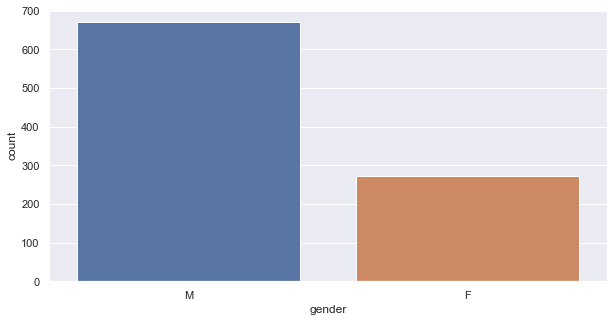

In [31]:
# Gender
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(user['gender'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text major ticklabel objects>)

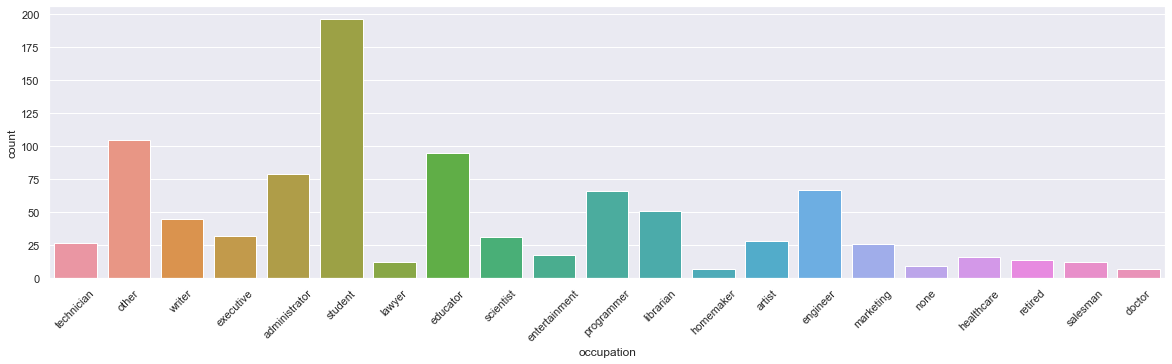

In [35]:
# Occupation
sns.countplot(user['occupation'])
plt.xticks(rotation=45)

In [ ]:
Insights:
1. More movies released in 90s
2. Among the users, student participation in the movie rating was the highest
3. Men rated the movies almost double the times than women
4. Participations merged from age group 20. Two populations of ages exists, one around 30s and other 47.   
5. Almost one third of ratings was 4  

### 8. Visualize how popularity of genres has changed over the years

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use item dataset to get count of movies released in a particular year, store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.

In [22]:
item

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao),01-Jan-1995,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
7,8,Babe,01-Jan-1995,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking,01-Jan-1995,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,10,Richard III,22-Jan-1996,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [23]:
item['rdate'] = pd.to_datetime(item['release date'])
item['ryear'] = item['rdate'].dt.year
item_t = item.loc[:,['Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western','ryear']]
item_tg = item_t.groupby(['ryear']).sum()
item_tg

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
ryear,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1933,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1934,0,0,0,0,2,0,0,1,0,0,0,1,1,1,0,0,0,0
1935,0,0,0,0,2,0,0,0,0,0,1,1,0,1,0,1,0,0
1936,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [24]:
# Highest Genre released vs Years
df_graph = item_tg.idxmax(axis = 1, skipna = True) 
df_graph

ryear
1922       Horror
1926        Drama
1930        Drama
1931        Crime
1932      Romance
1933       Comedy
1934       Comedy
1935       Comedy
1936       Comedy
1937      Musical
1938       Action
1939        Drama
1940       Comedy
1941        Drama
1942        Drama
1943    Adventure
1944      Mystery
1945    Animation
1946        Drama
1947    Film-Noir
1948    Film-Noir
1949        Drama
1950        Drama
1951        Drama
1952      Romance
1953       Comedy
1954        Drama
1955        Drama
1956        Drama
1957        Drama
1958        Drama
1959       Comedy
1960    Childrens
1961        Drama
1962        Drama
1963          War
1964      Musical
1965       Comedy
1966       Action
1967        Drama
1968       Sci-Fi
1969      Western
1970          War
1971       Comedy
1972        Drama
1973       Comedy
1974       Comedy
1975    Adventure
1976       Horror
1977    Adventure
1978       Comedy
1979       Comedy
1980       Comedy
1981       Action
1982        Drama
1983

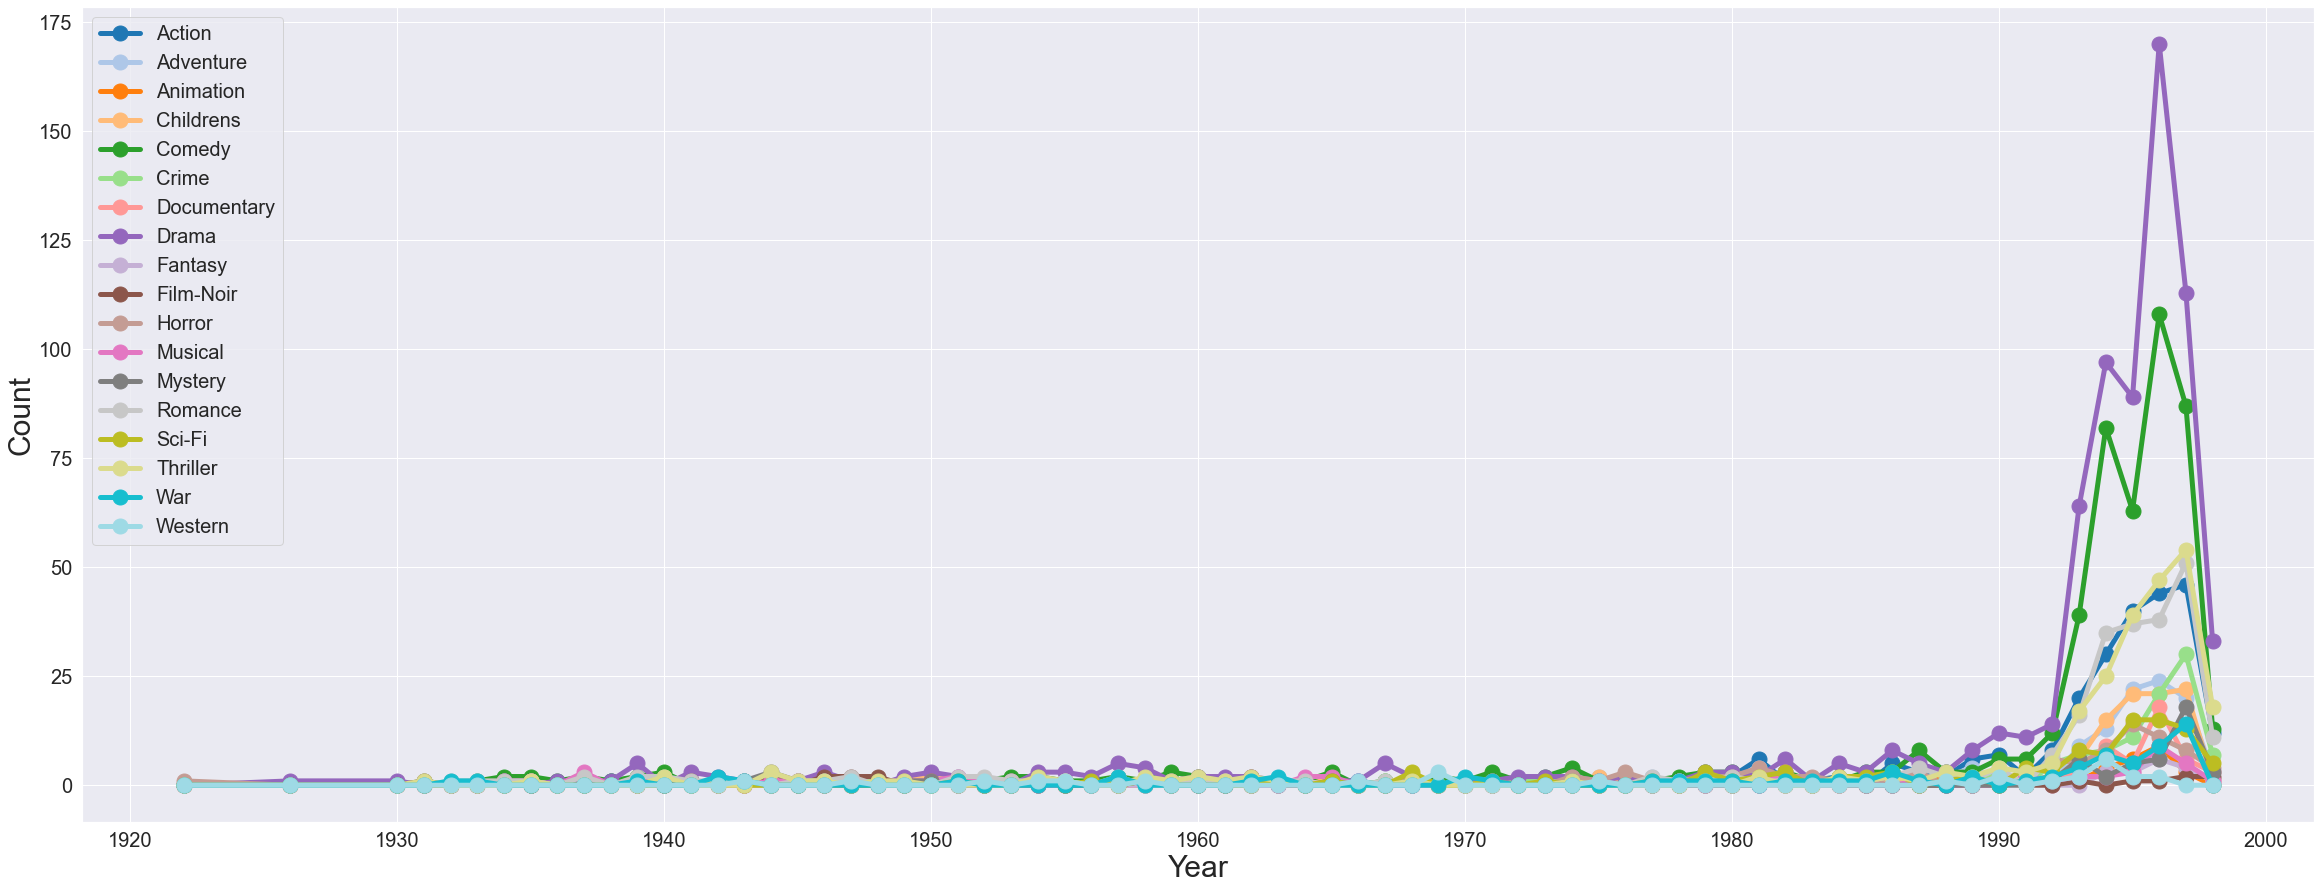

In [108]:
sns.set(rc={'figure.figsize':(40,15)})
item_tg.plot(kind='line',cmap="tab20",linewidth=5, marker="o",markersize=15)
plt.xlabel('Year', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.tick_params(labelsize=20)
plt.legend(fontsize=20)
plt.show()

**Insights:**
1. More movies were released in 90s 
2. Majority of them were Dramas indicating the popularity
3. Comedy the second popular release


### 9. Find the top 25 movies in terms of average ratings for movies that have been rated more than 100 times

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [111]:
# Find the count of ratings and average ratings for every movie.
mv_rating = pd.merge(data,item[['movie id','movie title']],how='left',on='movie id')
a = (mv_rating.groupby('movie title')['rating'].count().reset_index(name="r_count"))
b =  (mv_rating.groupby('movie title')['rating'].mean().reset_index(name="r_avg"))
mv_rating_all = pd.merge(a,b,how='left',on='movie title')
mv_rating_all

,movie title,r_count,r_avg
0,'Til There Was You,9,2.33
1,1-900,5,2.60
2,101 Dalmatians,109,2.91
3,12 Angry Men,125,4.34
4,187,41,3.02
5,2 Days in the Valley,93,3.23
6,"20,000 Leagues Under the Sea",72,3.50
7,2001: A Space Odyssey,259,3.97
8,3 Ninjas: High Noon At Mega Mountain,5,1.00
9,"39 Steps, The",59,4.05


In [37]:
# Slice the movies which have ratings more than 100.
mv_rating_all[mv_rating_all['r_count'] > 100].sort_values(by=['r_avg'], ascending=False, inplace=False)

,movie title,r_count,r_avg
317,"Close Shave, A",112,4.49
1278,Schindler's List,298,4.47
1647,"Wrong Trousers, The",118,4.47
272,Casablanca,243,4.46
1313,"Shawshank Redemption, The",283,4.45
1214,Rear Window,209,4.39
1567,"Usual Suspects, The",267,4.39
1394,Star Wars,583,4.36
3,12 Angry Men,125,4.34
302,Citizen Kane,198,4.29


In [38]:
# Sort values according to average rating such that movie which highest rating is on top.
mv_rating_all[mv_rating_all['r_count'] > 100].sort_values(by=['r_avg'], ascending=False, inplace=False)

,movie title,r_count,r_avg
317,"Close Shave, A",112,4.49
1278,Schindler's List,298,4.47
1647,"Wrong Trousers, The",118,4.47
272,Casablanca,243,4.46
1313,"Shawshank Redemption, The",283,4.45
1214,Rear Window,209,4.39
1567,"Usual Suspects, The",267,4.39
1394,Star Wars,583,4.36
3,12 Angry Men,125,4.34
302,Citizen Kane,198,4.29


In [39]:
# Select top 25 movies.
mv_rating_all[mv_rating_all['r_count'] > 100].sort_values(by=['r_avg'], ascending=False, inplace=False).nlargest(25,['r_avg'])

,movie title,r_count,r_avg
317,"Close Shave, A",112,4.49
1278,Schindler's List,298,4.47
1647,"Wrong Trousers, The",118,4.47
272,Casablanca,243,4.46
1313,"Shawshank Redemption, The",283,4.45
1214,Rear Window,209,4.39
1567,"Usual Suspects, The",267,4.39
1394,Star Wars,583,4.36
3,12 Angry Men,125,4.34
302,Citizen Kane,198,4.29


In [112]:
(mv_rating_all[mv_rating_all['r_count'] > 100]).count()

movie title    334
r_count        334
r_avg          334
dtype: int64

In [117]:
mv_rating_all['movie title'].count()

1658

In [119]:
mv_rating_all['r_count'].max()

583

Observations: 
1. Among  1681 movies, 1658 were rated
2. Among which 334 movies (20%)were rated by more than 100 users.
3. Close Shave, A scored the highest average rating among the movies analyzed
4. Star Wars the most rated by users (583 users) with an average rating of 4.36
    

### 10. Check for the validity of the below statements with respect to the data provided 

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

**Please pay attention to what should be the denominator while calculating percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [3]:
data_user = pd.merge(data,user[['user id','gender']],how='left',on= 'user id')

In [5]:
data_user_item = pd.merge(data_user,item,how='left',on= 'movie id')

In [12]:
# False: Men watch more drama than women
data_user_item.groupby(by='gender')['Drama'].sum().div(data_user_item['gender'].value_counts())*100
#*********** Women watch more drama than Men************************

F   42.77
M   38.90
dtype: float64

In [13]:
# False: Women watch more Sci-Fi than men
data_user_item.groupby(by='gender')['Sci-Fi'].sum().div(data_user_item['gender'].value_counts())*100
#***********Men watch more Sci Fi than Women************************

F   10.21
M   13.60
dtype: float64

In [14]:
# False: Men watch more Romance than women
data_user_item.groupby(by='gender')['Romance'].sum().div(data_user_item['gender'].value_counts())*100
# **************Women watch more Romance than Men***************

F   22.76
M   18.32
dtype: float64

**Conclusion:**
All the earlier statements were false and based on the data below are the facts:
    
Women watch more drama than Men
Men watch more Sci Fi than Women
Women watch more Romance than Men